## Author: Marktus A Atanga
## School: Johns Hopkins University
## Class: Introduction to Machine Learning
## Algorithm: Winnow2 Classification from Scratch

# Winnow2 Algorithm: Steps

1. choose threshold $\theta$ that will be used to decide predicted class
2. Choose a learning parameter $\alpha$ > 1 that will be used to promote or demote the weight
3. initialize weights to ones of size = data[columns]
4. Evaluate the linear function h(x) given by: 
    $h(x) = w_1x_1 + w_2x_2 + .... + w_dx_d = \sum_{i=1}^{d} w_ix_i$
5. The predicted class f(x) = 1 if h(x) > $\theta$, else f(x) = 0
6. how to promote weight:
    If the prediction is 0 but the correct output (actual) is 1,
    
    $w_i = \alpha w_i$ if $x_i = 1$
    
    $w_i = w_i$ if $x_i = 0$
    
7. How to demote weight:
    if the prediction is 1 but the correct output (actual) is 0
    
    $w_i = \frac{w_i}{\alpha}$ if $x_i = 1$
    
    $w_i = w_i$ if $x_i = 0$   

Since the Winnow2 algorithm takes only takes booleans, we need to convert the numerical data of for part1, part2, and part3 into boleans.To do this, we will take the mean of each variable in the data set and code any number value greater than the mean as 1 and any number less than the mean as 0.

### Model performance assessement 

Classification has a baseline for predicting the class label. We talked about this Null model
as the relative frequency of the most common class. Technically, this would be 𝑝 if 𝑝 > 50% or 1 − 𝑝 = 𝑞 if 𝑞 > 50%.
For example, suppose that for a binary problem, the relative frequency of the most common class is 87.3%. Then this
is the Null model for classification. If you guess “1” for any observation you see then you are right 87.3% of the time
and wrong 12.7% of the time. This is the Null model for binary classification.
For a multi-class problem, we pick the 𝑝𝑖 with the highest value. In machine learning, the NULL mode is known as OneR. We estimate OneR simply by calculating the relative frequencies of the class labels and picking the label with the highest relative frequency.
It is possible to formulate a variety of loss functions for the classification task. Taking the binary case, cross entropy
is one such function and the one used to find the 𝛽s in logistic regression. 𝐿(𝑦, ^𝑦) = 𝑦𝑙𝑜𝑔(^𝑦) + (1 − 𝑦)𝑙𝑜𝑔(1 − ^𝑦)
and there are others. However, I never see these functions used to evaluate classification models. They are normally
used by the algorithms, 𝑔(𝑋, 𝑦), to learn the classification models, 𝑓(𝑋), from data.
Instead, there are a variety of classification metrics that are used to evaluate how good or bad a classification model
is. The reason for this plethora of metrics is that there appear to be a number of ways that a classification prediction
can go right or wrong and different ways to summarize these outcomes. For a binary classification task, where “1” is
taken to mean “positive” or “in the class” and “0” is taken to be “negative” or “not in the class”, the possible cases for
a classification model are:


#### 1. Model Accuracy/Score
Model accuracy, also called model score is a measure of the percentage/fraction of the classess that are accurately predicted by the Niave Bayes classifier. It is expressed mathematically as: accuracy = (correct prediction count) /(length data to predict). The answer is always in the range [0, 1] inclusive and you can get the percentage acuuracy by simply multiplying the result by 100.

#### 2. Confusion matrix
In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (wikipedia.com). It is a 2x2 table specifying the four types of correctness or error as a measure of the classification model performance. It is extremely useful for measuring Recall, Precision, Specificity, Accuracy and most importantly the area under the receiver operating characteristic curve (AUC-ROC Curve). Assumming we have two classes classification problem where the classes are given as A and B, the elements of the confusion matrix is  outlined as follow:

    1. True Positive(TP): The actual class is A and the model correctly predicts it as A
    2. False Positive(FP): The actual class is B but the model incorrectly predicts it as A 
    3. True Negative(TN): The actual class is B and the model correctly predicts it as B
    4. False Negative(FN): The actual classs is A but the model incorrectly predicts it as B
~~~
                        Actaul values
                     |    | A    | B    |
predicted values     |----|------|------|
                     | A  | TP   |FP    |
                     | B  | FN   | TN   |
~~~

Let N = number of observations 
$N = TP + FP + FN + TN$

$Accuracy$: Out of all the classes, how much we predicted correctly. Sum of correct negative predictions and correct postive predictions divided by the total of all of the samples length.
$Accurcy = \frac{TP+TN}{N} = 1 - Error-rate$

$Error-rate = \frac{FP+FN}{N} = 1 - Accurcy$ (1 - sensitivity is the false negative rate)

The accuracy and error rate are the two most common metrics for evaluating classification models, but not necessarily sufficient measure of performance.
From the confusion matrix, we can infer two types of errors, classifying something that is "A" as a "B" or classifying something that is "B" as an "A". These two errors may not be equally costly. For instance diagnosing a patient for cancer when that patient actually has cancer is a good thing. But diagnosing a patient for cancer when that person does not have cancer (false alarm) is not good news but not costly as wrongly dianosing a person with cancer as not having cancer. Thus, which of the errors should be used depends on the cost that can be accomodated (tolerated).

These various possibilities each have their own names (sometimes several) and can be discussed in terms of the
confusion matrix. Some of the most common ones are:

1. $sensitivity$: Out of all the positive classes, how much we predicted correctly. If you have the cancer, how good is the model/test at detecting it? It is also called true positive rate (TPR), hit rate (HR), and recall. It is defined only in terms of the positive observations, both those the model predicted correctly and those it did not. This is better assessement of the model prediction capability than accuracy because it only take into account actually positive examples. TPR is the probability that the model predicts positive given that the example is actually positive. 
$Sensitivity = Recall = TPR = Hit-rate= \frac{TP}{TP+FN}$

2. $Specificity$: If you do not have the disease, how good is the model (test) at determining that (and not telling you that you do have it!)? This is the true negative rate (TNR)
$Specificity = \frac{TN}{TN+FP}$ (1 - specificity is the false positive rate)

3. $Precision$: Out of all the positive classes we have predicted correctly, how many are actually positive.
$Precision = \frac{TP}{TP+FP}$

4. $F_1$: It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score. F-score helps to measure Recall and Precision at the same time. It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more.

$F_1 = \frac{2*recall*precision}{recall + precision}$

$FPR$ or $fall-out$: False postive rate (FPR), also called 'fall-out' is defined as one minus specificity, or 1 - True Negative Rate (TNR). FPR is a more specific way of being wrong than 1- Accuracy since it only considers examples that are actually negative. FPR is the probability that the model predicts positive given that the example is actually negative. If the model is sensitive to postive prediction such that it always predicts postive, then the FPR = 1. Because it incorrectly predicts all negatives as postive, we call it false postive rate. This is not a good model since it cannot differentiate  postives from negatives.

$Sensitivity/Specificity$ $Tradeoff$:
From the forgoing, we can see that there are two things we want in the model: sensitivity and specificity.The model has to be sensitive so as to correctly predict all positives. Also, the model has to specific so as to only predict truly positives as positive. Thus, an optimal model should have TPR = 1.0  and FPR = 0.0 (1.0 - specificity = 0.0). However, search an optimal model is difficult to attain in reality because increasing sensitivity decreases specificity and the vice versa. 

In [1]:
%matplotlib inline

In [2]:
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.options.display.float_format = '{:,.6f}'.format
sys.path.append("c:\python38\lib\site-packages")
from tabulate import tabulate
sys.path.append(r"C:\Users\maa5m\ENG605.649.31.FA20_introduction_to_machine_learning\project1")


#### 1. Load the data set

There might be some white spaces in the excel sheets so we add sep="\s*,\s*" and engine='python' to remove white space in the data.

In [3]:
part1 = pd.read_csv("proj1_part1.csv", sep="\s*,\s*", header = None, engine='python')
part2 = pd.read_csv("proj1_part2.csv", sep="\s*,\s*", header = None, engine='python')
part3 = pd.read_csv("proj1_part3.csv", sep="\s*,\s*", header = None, engine='python')
part4 = pd.read_csv("house-votes-84.csv", sep="\s*,\s*", header = None, engine='python')

In [4]:
part1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6000 non-null   float64
 1   1       6000 non-null   float64
 2   2       6000 non-null   object 
dtypes: float64(2), object(1)
memory usage: 140.8+ KB


In [5]:
part2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6000 non-null   float64
 1   1       6000 non-null   float64
 2   2       6000 non-null   object 
dtypes: float64(2), object(1)
memory usage: 140.8+ KB


In [6]:
part3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6000 non-null   float64
 1   1       6000 non-null   float64
 2   2       6000 non-null   object 
dtypes: float64(2), object(1)
memory usage: 140.8+ KB


In [7]:
part4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       435 non-null    object
 1   1       435 non-null    object
 2   2       435 non-null    object
 3   3       435 non-null    object
 4   4       435 non-null    object
 5   5       435 non-null    object
 6   6       435 non-null    object
 7   7       435 non-null    object
 8   8       435 non-null    object
 9   9       435 non-null    object
 10  10      435 non-null    object
 11  11      435 non-null    object
 12  12      435 non-null    object
 13  13      435 non-null    object
 14  14      435 non-null    object
 15  15      435 non-null    object
 16  16      435 non-null    object
dtypes: object(17)
memory usage: 57.9+ KB


For the first 3 data sets (part1, part2, part3) each has 6000 data rows and 3 columns identified by index (0, 1, 2). The first two columns in each data set are floats and the last column in each data set is an object, this object column is the class label. Since we expect each data set to have 6000 rows, then there is no NAN values in the data sets.

In the 4th data set (part4) however, there 435 rows and 17 columns and the data type for each row is object. This data set represents the voting data downloaded from https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records.

#### 2. Pre-process each data set as necessary to handle missing data and non-Boolean data (both classes and attributes)

The first three data sets are easier to deal with so we will concerntrate on those for now and keep the voteing data for for last. 

Let's give some labels to the headers of the data to make it easier to work with. Since each data set has two variables and the class label, let's name them x1, x2, class

In [8]:
part1 = part1.rename(columns = {0: "x1", 1: "x2", 2: "class"}).reset_index(drop=True)
part2 = part2.rename(columns = {0: "x1", 1: "x2", 2: "class"}).reset_index(drop=True)
part3 = part3.rename(columns = {0: "x1", 1: "x2", 2: "class"}).reset_index(drop=True)

In [9]:
#check for missing data


We have successfully given the names to the columns. Let see how many unique classes we have in the each data set.

In [10]:
print("part1",part1["class"].unique(), "\n\npart2\n", part2["class"].unique(),"\n\npart3\n", part3["class"].unique())

part1 ['A' 'B'] 

part2
 ['C' 'D'] 

part3
 ['E' 'F']


Each data set has 2 unique classes: part1 classes are A and B, part2 classes are C and D, and part3 classes are E and F

For the Naive Bayes algorithm, we do not need to convert the x1 and x2 values to [0, 1]. However, we should consider changing the class labels to make it easier working with. We should not use lable encoder, get_dummies, One Hot Encoding, or any encoding from python libraries.
With just two classes in the data, we can do custom binary encoding.

In [11]:
#make copies of the data
df1 = part1.copy()
df2 = part2.copy()
df3 = part3.copy()

#perform binary encoding
df1["class"] = np.where(df1["class"].str.contains("A"), 0, 1)
df2["class"] = np.where(df2["class"].str.contains("C"), 0, 1)
df3["class"] = np.where(df3["class"].str.contains("E"), 0, 1)

In [12]:
df1.sample(frac = 1).head(5)

,x1,x2,class
3843,6.545400,3.436763,1
159,4.367855,5.300378,0
2654,4.344351,4.877053,0
4730,3.984662,2.497646,1
4488,5.426847,3.673495,1


In [13]:
df2.sample(frac = 1).head(5)

,x1,x2,class
3606,4.300340,3.112849,1
3157,2.909459,1.691179,1
3385,2.643090,1.487053,1
3872,4.513048,3.287330,1
2460,3.779980,4.751410,0


In [14]:
df3.sample(frac = 1).head(5)

,x1,x2,class
3821,4.356684,3.197279,1
611,2.172967,5.428937,0
3461,5.994939,4.056586,1
3658,5.244682,3.086884,1
2946,4.520247,4.769355,0


Have successfully encoded the class variable, and since they are only two classes in the data we got 0 and 1 as the classes.

What is the frequency of each class in a data set

In [15]:
df1["class"].value_counts(normalize=True, sort = False)

0   0.500000
1   0.500000
Name: class, dtype: float64

In [16]:
df2["class"].value_counts(normalize=True, sort = False)

0   0.500000
1   0.500000
Name: class, dtype: float64

In [17]:
df3["class"].value_counts(normalize=True, sort = False)

0   0.500000
1   0.500000
Name: class, dtype: float64

There is 50% frquency of each of the two classes in it their data sets

The data seems to be separable plane. The blue data belong to class 0 and the green data belong to class 1.

Since we know this data comes from a normal distribution, we should probably check how their histogram distribution looks like.

In [18]:
#part1 data
A = df1[df1["class"] == 0].reset_index(drop=True); B = df1[df1["class"] == 1].reset_index(drop=True)

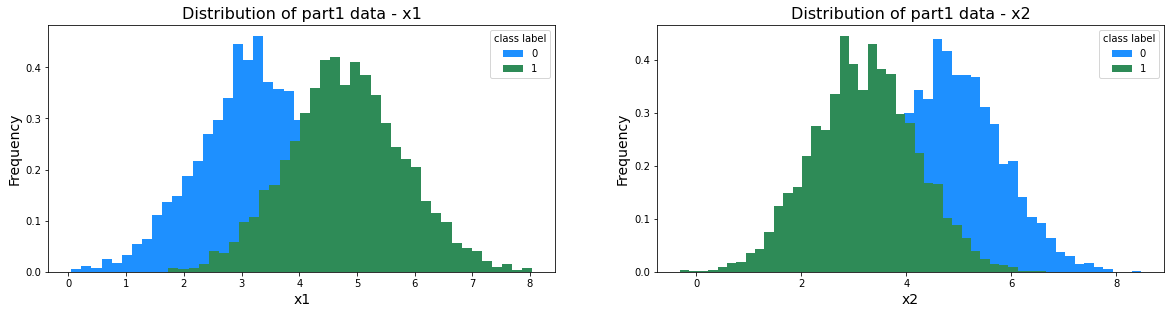

In [19]:
figure = plt.figure(figsize=(20,10))
ax = plt.subplot(2,2,1)
ax.hist(A["x1"], bins="auto", density=True, color="DodgerBlue", label = "0")
ax.hist(B["x1"], bins="auto", density=True, color="seagreen", label = "1")
plt.title("Distribution of part1 data - x1", fontsize = 16)
plt.ylabel( "Frequency", fontsize = 14)
plt.xlabel( "x1", fontsize = 14)
plt.legend(title = "class label")

ax = plt.subplot(2,2,2)
ax.hist(A["x2"], bins="auto", density=True, color="DodgerBlue", label = "0")
ax.hist(B["x2"], bins="auto", density=True, color="seagreen", label = "1")
plt.title("Distribution of part1 data - x2", fontsize = 16)
plt.ylabel( "Frequency", fontsize = 14)
plt.xlabel( "x2", fontsize = 14)
plt.legend(title = "class label")
plt.show()
plt.close()   

the mean X1 values are higher for class 1 compared to class 0 but the mean x2 values are lower for class 1 compared to class 0.

In [20]:
#part2 data
C = df2[df2["class"] == 0].reset_index(drop=True); D = df2[df2["class"] == 1].reset_index(drop=True)

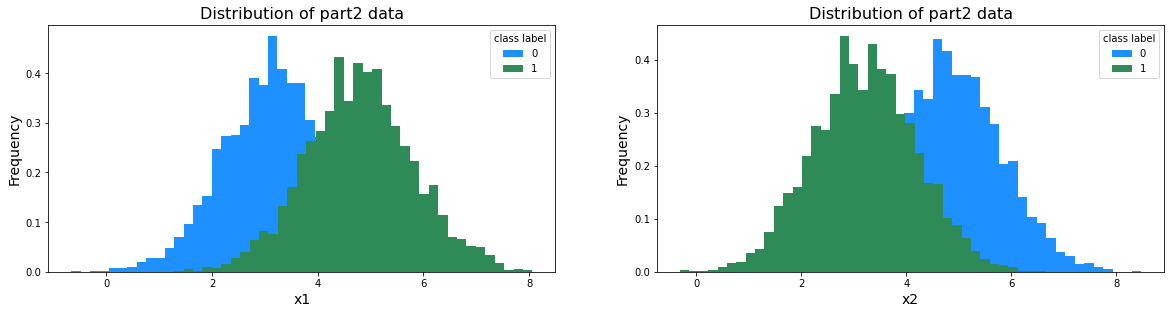

In [21]:
figure = plt.figure(figsize=(20,10))
ax = plt.subplot(2,2,1)
ax.hist(C["x1"], bins="auto", density=True, color="DodgerBlue", label = "0")
ax.hist(D["x1"], bins="auto", density=True, color="seagreen", label = "1")
plt.title("Distribution of part2 data", fontsize = 16)
plt.ylabel( "Frequency", fontsize = 14)
plt.xlabel( "x1", fontsize = 14)
plt.legend(title = "class label")

ax = plt.subplot(2,2,2)
ax.hist(A["x2"], bins="auto", density=True, color="DodgerBlue", label = "0")
ax.hist(B["x2"], bins="auto", density=True, color="seagreen", label = "1")
plt.title("Distribution of part2 data", fontsize = 16)
plt.ylabel( "Frequency", fontsize = 14)
plt.xlabel( "x2", fontsize = 14)
plt.legend(title = "class label")
plt.show()
plt.close()   

the mean X1 values are higher for class 1 compared to class 0 but the mean x2 values are lower for class 1 compared to class 0.

In [22]:
#part3 data
E = df3[df3["class"] == 0].reset_index(drop=True); F = df3[df3["class"] == 1].reset_index(drop=True)

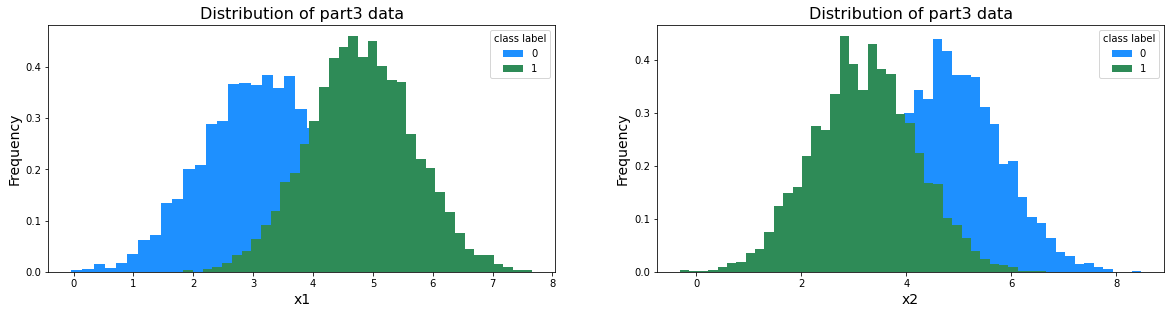

In [23]:
figure = plt.figure(figsize=(20,10))
ax = plt.subplot(2,2,1)
ax.hist(E["x1"], bins="auto", density=True, color="DodgerBlue", label = "0")
ax.hist(F["x1"], bins="auto", density=True, color="seagreen", label = "1")
plt.title("Distribution of part3 data", fontsize = 16)
plt.ylabel( "Frequency", fontsize = 14)
plt.xlabel( "x1", fontsize = 14)
plt.legend(title = "class label")

ax = plt.subplot(2,2,2)
ax.hist(A["x2"], bins="auto", density=True, color="DodgerBlue", label = "0")
ax.hist(B["x2"], bins="auto", density=True, color="seagreen", label = "1")
plt.title("Distribution of part3 data", fontsize = 16)
plt.ylabel( "Frequency", fontsize = 14)
plt.xlabel( "x2", fontsize = 14)
plt.legend(title = "class label")
plt.show()
plt.close()   

the mean X1 values are higher for class 1 compared to class 0 but the mean x2 values are lower for class 1 compared to class 0.

Visualize the data to see what we are dealing with.

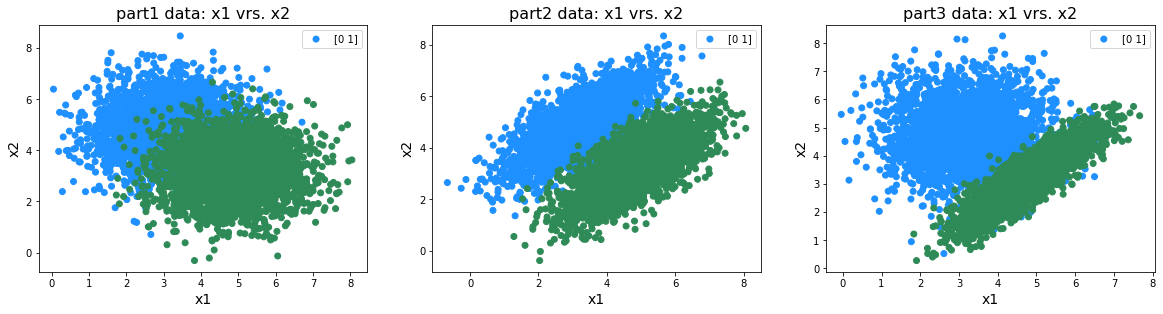

In [24]:
figure = plt.figure(figsize=(20,10))

axes = figure.add_subplot(2, 3, 1)
labels = [0, 1]
colors = df1["class"].apply(lambda x: "DodgerBlue" if x ==0  else 'seagreen')
axes.scatter(df1.x1, df1.x2,  color = colors, label = df2["class"].unique())
axes.set_title("part1 data: x1 vrs. x2",  fontsize  = 16)
axes.set_xlabel( "x1",  fontsize  = 14)
axes.set_ylabel( "x2",  fontsize  = 14)
axes.legend()

axes = figure.add_subplot(2, 3, 2)
colors = df2["class"].apply(lambda x: "DodgerBlue" if x ==0  else 'seagreen')
axes.scatter(df2.x1, df2.x2, color = colors, label = df2["class"].unique())
axes.set_title("part2 data: x1 vrs. x2",  fontsize  = 16)
axes.set_xlabel( "x1", fontsize  = 14)
axes.set_ylabel( "x2",  fontsize  = 14)
axes.legend()

axes = figure.add_subplot(2, 3, 3)
colors = df3["class"].apply(lambda x: "DodgerBlue" if x ==0  else 'seagreen')
axes.scatter(df3.x1, df3.x2, color = colors, label = df3["class"].unique())
axes.set_title("part3 data: x1 vrs. x2",  fontsize  = 16)
axes.set_xlabel( "x1",  fontsize  = 14)
axes.set_ylabel( "x2",  fontsize  = 14)
axes.legend()

plt.show()

## Numerical to boolean

Since the winnow2 algorithm works with boolean data, we would have to convert the numerical data into boolean to use the algorithm.

In [25]:
def numerical_to_boolean(x):
    """
    This fucntion takes a column of the data, calculates the mean
    and set any number less than the mean to zero, else 1
    """
    coded = []
    mean = np.mean(x)
    for num in x:
        if num < mean:
            coded.append(0)
        else:
            coded.append(1)
            
    return coded

In [26]:
df1_coded = df1.apply(lambda x: numerical_to_boolean(x) if x.name in ['x1', 'x2'] else x)
df2_coded = df2.apply(lambda x: numerical_to_boolean(x) if x.name in ['x1', 'x2'] else x)
df3_coded = df3.apply(lambda x: numerical_to_boolean(x) if x.name in ['x1', 'x2'] else x)

Let's write some simple function that will calculate the percentage of each variable boolean values (0, 1) in each class

In [27]:
def normalize_values(data):    
    
    var, var_00, var_01, var_10, var_11 = [], [], [], [], []
    
    for col in data.columns:
        if col == "class":
            continue
            
        #get the normalized values for each boolean type for each class
        freq = data.groupby("class")[col].value_counts(normalize=True, sort = False)
        
        cv00, cv01, cv10, cv11 = freq[0][0], freq[0][1], freq[1][0], freq[1][1]  
        var.append(col)
        var_00.append(cv00)
        var_01.append(cv01)
        var_10.append(cv10)
        var_11.append(cv11)
    
    #store the data in a dataframe
    data_norm = pd.DataFrame(list(zip(var,  var_00, var_01, var_10, var_11)), 
                          columns =["attribute", "cl0_x_0", "cl0_x_1", "cl1_x_0", "cl1_x_1"])
    return data_norm

In [28]:
#get normalized attribute booleans
df1_norm = normalize_values(df1_coded)
df2_norm = normalize_values(df2_coded)
df3_norm = normalize_values(df3_coded)

#set the attribute to be index
df1_norm.set_index("attribute", inplace = True)
df2_norm.set_index("attribute", inplace = True)
df3_norm.set_index("attribute", inplace = True)

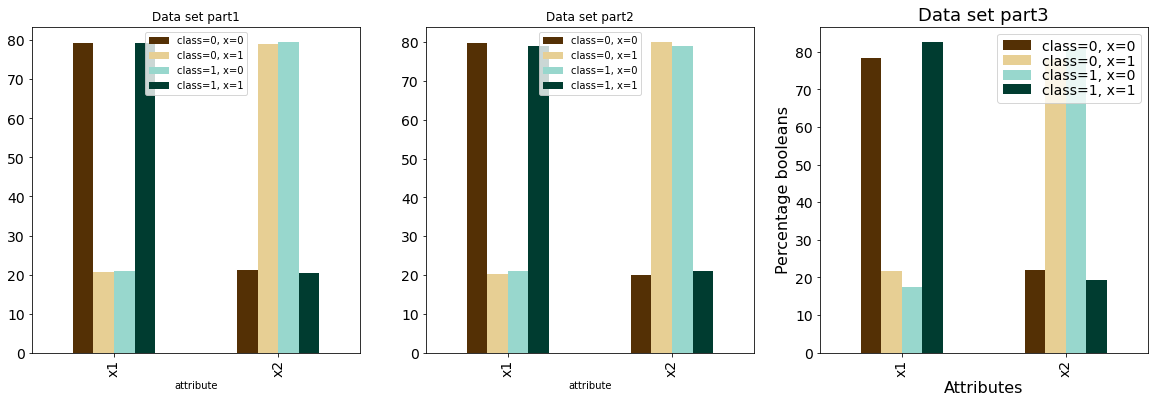

In [29]:
#plot the normalized data

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False)
ax.invert_xaxis()
ax.yaxis.tick_right()

df1_normplot = pd.DataFrame({'class=0, x=0': df1_norm.cl0_x_0*100,
                           'class=0, x=1': df1_norm.cl0_x_1*100,
                           'class=1, x=0':   df1_norm.cl1_x_0*100,
                           'class=1, x=1':   df1_norm.cl1_x_1*100,
                          }, 
                           index=df1_norm.index)
df1_normplot.plot.bar(title='Data set part1', figsize=(20,6), cmap='BrBG', ax=ax1, fontsize = 14)
plt.title('Data set part3', fontsize = 18)
plt.xlabel("Attributes",  fontsize = 16)
plt.ylabel("Percentage booleans",  fontsize = 16)


df2_normplot = pd.DataFrame({'class=0, x=0': df2_norm.cl0_x_0*100,
                           'class=0, x=1': df2_norm.cl0_x_1*100,
                           'class=1, x=0':   df2_norm.cl1_x_0*100,
                           'class=1, x=1':   df2_norm.cl1_x_1*100,
                          }, 
                           index=df2_norm.index)
df2_normplot.plot.bar(title='Data set part2', figsize=(20,6), cmap='BrBG', ax=ax2, fontsize = 14)
plt.title('Data set part3', fontsize = 18)
plt.xlabel("Attributes",  fontsize = 16)
plt.ylabel("Percentage booleans",  fontsize = 16)


df3_normplot = pd.DataFrame({'class=0, x=0': df3_norm.cl0_x_0*100,
                           'class=0, x=1': df3_norm.cl0_x_1*100,
                           'class=1, x=0':   df3_norm.cl1_x_0*100,
                           'class=1, x=1':   df3_norm.cl1_x_1*100,
                          }, 
                           index=df2_norm.index)
df3_normplot.plot.bar(title='Data set part3', figsize=(20,6), cmap='BrBG', ax=ax3, fontsize = 14)
plt.title('Data set part3', fontsize = 18)
plt.xlabel("Attributes",  fontsize = 16)
plt.ylabel("Percentage booleans",  fontsize = 16)
plt.legend(ncol=1, labelspacing=0.05, fontsize = 14)

plt.show()

For class 0 attribute x1 from the bar plot, there is higher percentage of the data with values 0 and smaller percentage with values 1. Where for class 1 attribute x1, majority of the data have values 1 and minority have values 0. This makes sense in terms of decision boundary for separation. The converse is true for attribute x2.

### Now let's deal with the voting  data

From the information given on the website, the attributes in the votes data are given below:
~~~
   1. Class Name                             : 2 (democrat republican):class
   2. handicapped-infants                    : 2 (y	n)                :infants
   3. water-project-cost-sharing             : 2 (y	n)                :water             
   4. adoption-of-the-budget-resolution      : 2 (y	n)                :budget
   5. physician-fee-freeze                   : 2 (y	n)                :physician
   6. el-salvador-aid                        : 2 (y	n)                :salvador
   7. religious-groups-in-schools            : 2 (y	n)                :religious
   8. anti-satellite-test-ban                : 2 (y	n)                :satellite
   9. aid-to-nicaraguan-contras              : 2 (y	n)                :nicaraguan
  10. mx-missile                             : 2 (y	n)                :missile
  11. immigration                            : 2 (y	n)                :immigration
  12. synfuels-corporation-cutback           : 2 (y	n)                :synfuels
  13. education-spending                     : 2 (y	n)                :education
  14. superfund-right-to-sue                 : 2 (y	n)                :superfund
  15. crime                                  : 2 (y	n)                :crime
  16. duty-free-exports                      : 2 (y	n)                :duty
  17. export-administration-act-south-africa : 2 (y	n)                :south_africa
~~~

Aside the "yay" (y) and "nay" (n) votes, we have and missing vote (?). We need to decide on how to handle that missing vote too. I have name the attributes (seen in the third column) so i can easily use in the analysis.

In [30]:
#create headers for the data
headers = ["class", "infants", "water", "budget", "physician", "salvador", "religious", "satellite", "nicaraguan", 
            "missile", "immigration", "synfuels", "education", "superfund", "crime", "duty", "south_africa"]

#read data with pandas read csv function
votes = pd.read_csv("house-votes-84.csv", sep="\s*,\s*", names = headers, engine='python')

#shuffle the data
votes.sample(frac = 1).head(5)

,class,infants,water,budget,physician,salvador,religious,satellite,nicaraguan,missile,immigration,synfuels,education,superfund,crime,duty,south_africa
269,democrat,y,n,y,n,n,n,y,y,y,n,n,n,n,n,n,y
164,democrat,y,y,n,n,y,y,n,n,n,y,y,y,y,y,n,?
352,democrat,n,y,n,y,n,y,y,y,y,n,y,n,y,n,y,?
315,republican,n,y,y,y,y,y,y,?,n,n,n,n,?,?,y,?
177,democrat,n,n,y,n,n,n,y,y,y,y,y,?,n,n,y,y


Let's check how many unique information we have about each feature in the data set and what is the percentage of that information in the feature

In [31]:
#intialize list to store the data
var, var_n , var_y, var_mis = [], [], [], []

#get normalized data 
for col in votes.columns:
    if col == "class":
        continue
    freq = votes[col].value_counts(normalize=True, sort = False)
    n, y, missing = freq[0], freq[1], freq[2]
    var.append(col);  var_n.append(n);  var_y.append(y); var_mis.append(missing)

#put the data in a dataframe
votes_normalzied = pd.DataFrame(list(zip(var, var_n, var_y, var_mis)), 
                                columns =["attribute", "nay", "yay", "missing"]) 

In [32]:
#check party representations
votes["class"].value_counts(normalize=True, sort = False)

democrat     0.613793
republican   0.386207
Name: class, dtype: float64

In [33]:
votes_normalzied.set_index("attribute", inplace = True)

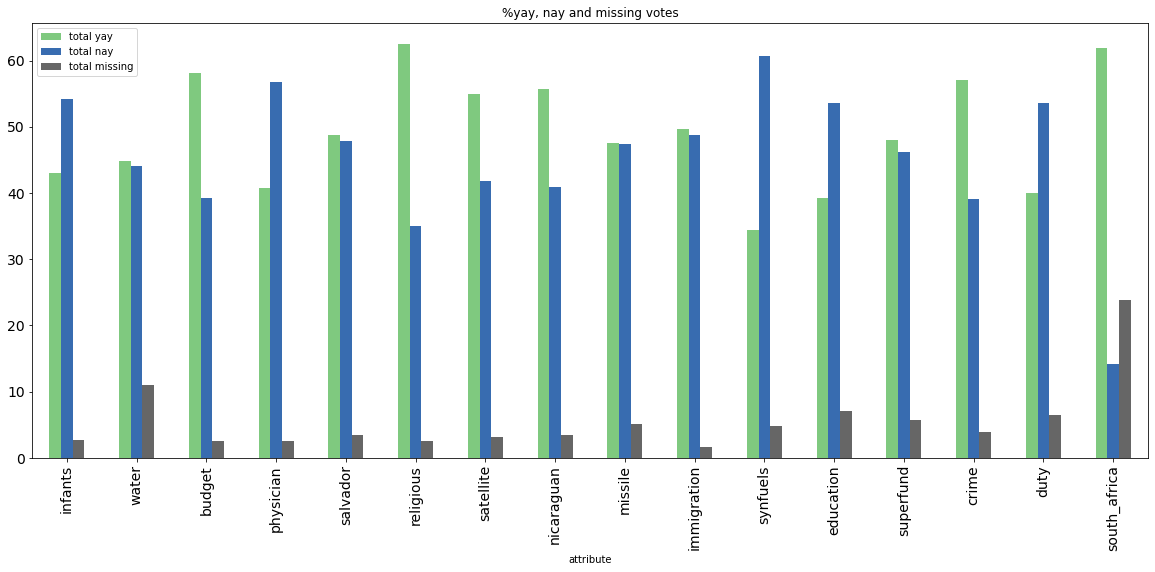

In [34]:
#plot the normalized vote data
votes_norm = pd.DataFrame({'total yay': votes_normalzied.yay*100,
                   'total nay': votes_normalzied.nay*100,
                   'total missing': votes_normalzied.missing*100,
                  }, 
                   index=votes_normalzied.index)
votes_norm.plot.bar(title='%yay, nay and missing votes', figsize=(20,8), cmap='Accent', fontsize = 14)
plt.show()

We have 61.38% of the data is associated with democrates and 38.62% are with repbulicans. Remaing features have "y", "n" and "?" as their values. The amount of missing data differ from feature to feature but each feature has less than 10% missing data except $water-project-cost-sharing$ which has 11% missing data and $export-administration-act-south-africa$ has 23.9% missing data. This is a lot of missing data so we need to impute for them instead of discarding.

#####  Next step is to deal with the missing values in the data.
Missing data is an issue commonly accounted in data analysis. If we have really large data set and only a few are missing, then the best decision is to discard the missing data rows. Most often than not, we not have the luxury of sufficiently large data and so cannot discard the missing data. There is therefore the need to impute the missing data. 

For numerical data set, we can fill in the missing day by imputing the mean of the attributes. But even in that case, one has to be careful since overusing the mean value can skew the analysis in to the mean. 

Another approach is apply imputation by regression. In this case, we try to predict the missing data for a variable from other variables whose values are known for that case. This approach is valuable if the variables are correlated.

For discrete variable, we can use the value that is most frequent to fill in the missing data. This is the approach we employ here to deal with missing data in the votes data set.

In [35]:
#make copy of data
df4 = votes.copy()
df4.head(5)

,class,infants,water,budget,physician,salvador,religious,satellite,nicaraguan,missile,immigration,synfuels,education,superfund,crime,duty,south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


This results shows that "n" is most freent in the infants votes, so we use that to fill missing data for the infants attribute. Now let's do it for the data set.

In [36]:
## Impute missing values using the most frequently occuring value
for col in df4.columns:
    if col == "class":
        continue
    freq = df4[col].value_counts(normalize=True, sort = False)
    n, y, missed = freq[0], freq[1], freq[2]    
    for index, row in df4.iterrows():
        if ((n > y) & (row[col]== "?")):
            row[col]= 'n'
        elif ((n < y) & (row[col]== "?")):
            row[col]= "y"

In [37]:
df4.head(5)

,class,infants,water,budget,physician,salvador,religious,satellite,nicaraguan,missile,immigration,synfuels,education,superfund,crime,duty,south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
2,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,n,y,y,y,y


If we compare the dataframe for before and after, we can see that we have successfully imputed and filled the missing data.

Time to encode the data. For now we will encode the class and the "y" and "n". For instance if class = republican, we set it to 0, if democrat we set to 1. If the vote is "n" set to 0, if "y" set to 1. 

In [38]:
#encode n, y, and class values
for index, row in df4.iterrows():
    for col in df4.columns:
        if ((row[col] == "n") | (row[col] == "republican")):
            row[col]= 0
        elif ((row[col] == "y") | (row[col] == "democrat")):
            row[col]= 1

In [39]:
df4.head(5)

,class,infants,water,budget,physician,salvador,religious,satellite,nicaraguan,missile,immigration,synfuels,education,superfund,crime,duty,south_africa
0,0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,1,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,1,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


The before and after data view shows the encoding is correct.

In [40]:
var, rep_var_n, rep_var_y, dem_var_n, dem_var_y = [], [], [], [], []

""" 
get normalized nay and yay votes by parties
This function gives the fraction of republicans who voted yay, nay
and the fraction of democrates who voted yay, nay
"""
for col in df4.columns:
    if col == "class":
        continue
    freq = df4.groupby("class")[col].value_counts(normalize=True, sort = False)
    rep_nay, rep_yay, dem_nay, dem_yay = freq[0][0], freq[0][1], freq[1][0], freq[1][1]  
    var.append(col)
    rep_var_n.append(rep_nay)
    rep_var_y.append(rep_yay)
    dem_var_n.append(dem_nay)
    dem_var_y.append(dem_yay)

#store the data in a dataframe
norm_votes = pd.DataFrame(list(zip(var,  rep_var_n, rep_var_y, dem_var_n, dem_var_y)), 
                          columns =["attribute", "rep_nay", "rep_yay", "dem_nay", "dem_yay"]) 

In [41]:
norm_votes.set_index("attribute", inplace = True)

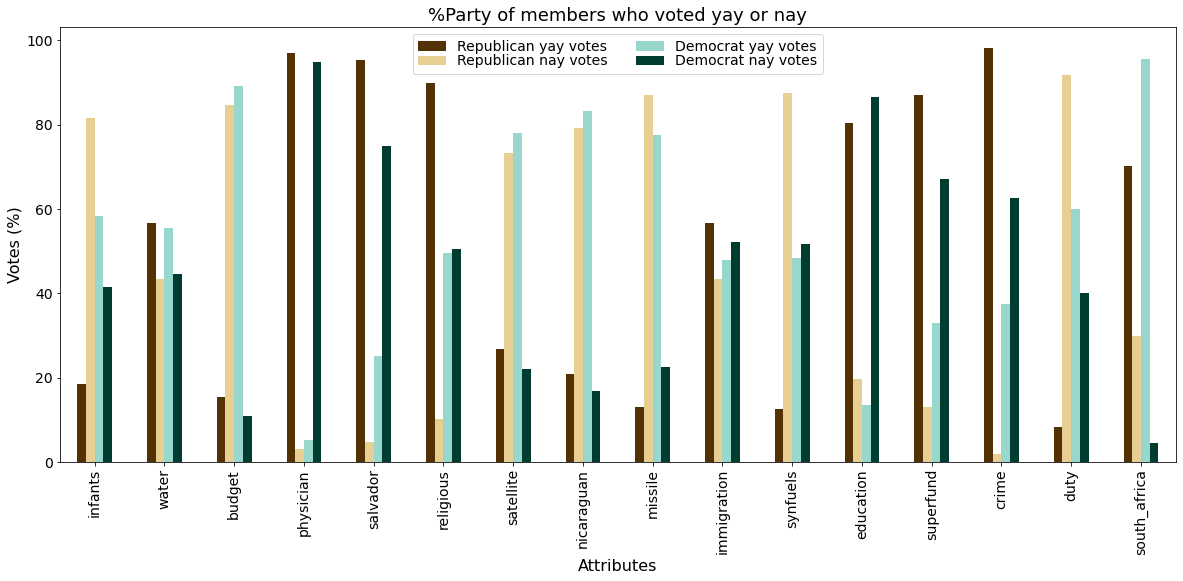

In [42]:
#plot the normalized vote data
norm_votes = pd.DataFrame({'Republican yay votes': norm_votes.rep_yay*100,
                           'Republican nay votes': norm_votes.rep_nay*100,
                           'Democrat yay votes':   norm_votes.dem_yay*100,
                           'Democrat nay votes':   norm_votes.dem_nay*100,
                          }, 
                           index=norm_votes.index)
norm_votes.plot.bar(figsize=(20,8), cmap='BrBG', fontsize = 14)

plt.title('%Party of members who voted yay or nay', fontsize = 18)
plt.xlabel("Attributes",  fontsize = 16)
plt.ylabel("Votes (%)",  fontsize = 16)
plt.legend(ncol=2, labelspacing=0.05, fontsize = 14)
plt.show()

This is interesting insight into the data. For issues that majority of replicans voted yay, majority of democrates voted nay and the vice versa. Majority of republicans voted yay on issues such as physician-fee-freeze , el-salvador-aid, religious-groups-in-schools, immigration, education-spending, crime and export-administration-act-south-africa whereas mojority of republicans voted nay on issues such as handicapped-infants, water-project-cost-sharing , adoption-of-the-budget-resolution  , anti-satellite-test-ban , aid-to-nicaraguan-contras, mx-missile, synfuels-corporation-cutback , and duty-free-exports.

On the other hand, majority of democrates voted yay on issues such as handicapped-infants, adoption-of-the-budget-resolution, anti-satellite-test-ban, aid-to-nicaraguan-contras, mx-missile, synfuels-corporation-cutback, duty-free-exports, and export-administration-act-south-africa. While the majority of democrats also voted nay on issues such as water-project-cost-sharing, physician-fee-freeze, el-salvador-aid, religious-groups-in-schools , education-spending, superfund-right-to-sue, immigration, and crime.

On the grounds of this chart, we can even identify a voters party with higher probability given an attributed and yay and nay votes. But the Naive-Bayes classifier and Winnow2 algorithms will do this for us.

Let's get more information about the votes data before we head to splitting and modeling the data. It will be good to get a statistical view of the data set we are about to model.

In [43]:
republicans = df4[df4["class"] == 0].reset_index(drop=True)
democrats   = df4[df4["class"] == 1].reset_index(drop=True)

In [44]:
rep_var = []
rep_var_0 = []
rep_var_1 = []

#republicans nay and yay votes
for col in republicans.columns:
    if col == "class":
        continue
    freq = republicans[col].value_counts(normalize=True, sort = False)
    n, y = freq[0], freq[1] 
    rep_var.append(col)
    rep_var_0.append(n)
    rep_var_1.append(y)

republican_votes = pd.DataFrame(list(zip(rep_var, rep_var_0, rep_var_1)), columns =["attribute", "nay", "yay"]) 

dem_var = []
dem_var_0 = []
dem_var_1 = []

#democrats nay and yay votes
for col in democrats.columns:
    if col == "class":
        continue
    freq = democrats[col].value_counts(normalize=True, sort = False)
    n, y = freq[0], freq[1] 
    dem_var.append(col)
    dem_var_0.append(n)
    dem_var_1.append(y)
    
democrat_votes = pd.DataFrame(list(zip(dem_var, dem_var_0, dem_var_1)), columns =["attribute", "nay", "yay"]) 

Visualize the vote patterns

In [45]:
republican_votes.set_index("attribute", inplace = True)
democrat_votes.set_index("attribute", inplace = True)

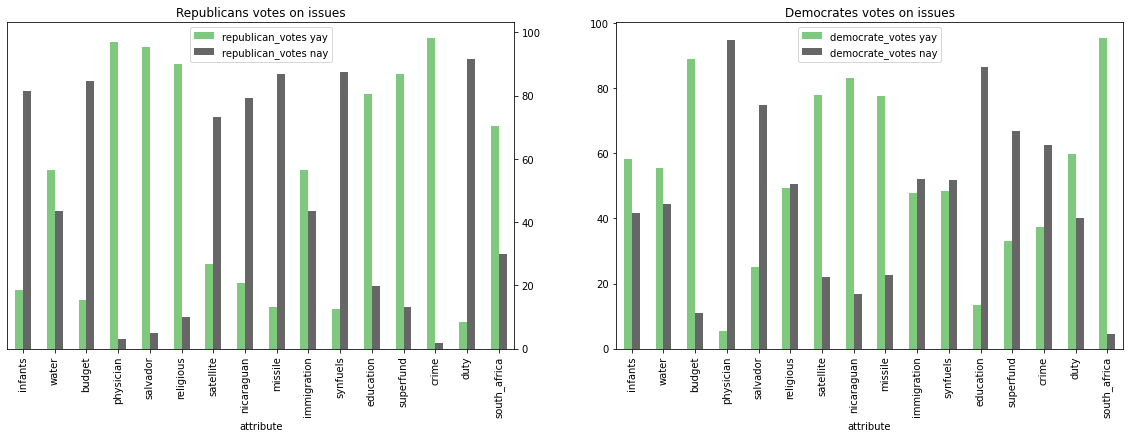

In [46]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=False)
ax.invert_xaxis()
ax.yaxis.tick_right()

rep = pd.DataFrame({'republican_votes yay': republican_votes.yay*100,
                   'republican_votes nay': republican_votes.nay*100,
                  }, 
                   index=republican_votes.index)

rep.plot.bar(title='Republicans votes on issues', figsize=(20,6), cmap='Accent', ax=ax)

dem = pd.DataFrame({'democrate_votes yay': democrat_votes.yay*100,
                   'democrate_votes nay': democrat_votes.nay*100,
                  }, 
                   index=democrat_votes.index)
dem.plot.bar(title='Democrates votes on issues', figsize=(20,6), cmap='Accent', ax=ax2)

plt.show()

This is interesting insight into the data. Majority of republicans vote yay on issues such as physician-fee-freeze , el-salvador-aid, religious-groups-in-schools, immigration, education-spending, crime and export-administration-act-south-africa whereas mojority of republicans voted nay on issues such as handicapped-infants, water-project-cost-sharing , adoption-of-the-budget-resolution  , anti-satellite-test-ban , aid-to-nicaraguan-contras, mx-missile, synfuels-corporation-cutback , and duty-free-exports.

On the other hand, majority of democrates voted yay on issues such as handicapped-infants, adoption-of-the-budget-resolution, anti-satellite-test-ban, aid-to-nicaraguan-contras, mx-missile, synfuels-corporation-cutback, duty-free-exports, and export-administration-act-south-africa. While the majority of democrats also voted nay on issues such as water-project-cost-sharing, physician-fee-freeze, el-salvador-aid, religious-groups-in-schools , education-spending, superfund-right-to-sue, immigration, and crime.

On the grounds of this chart, we can even identify a voters party by their majority vote. But the Naive-Bayes classifier and Winnow2 algorithms will do this for us.

In [47]:
df4.groupby("class")["infants"].value_counts(normalize = True)

class  infants
0      0         0.815476
       1         0.184524
1      1         0.584270
       0         0.415730
Name: infants, dtype: float64

#### 3. Set up your test and training sets from the provided data. Specifically, split the data into two groups randomly where 2/3 of the data will be used for training and 1/3 will be used for testing.

We can use the random sample function in pandas to split the data set into train data set and test data set.

In [48]:
#check the number of rows in each data set
print("part1 rows:",df1.shape[0], " part2 rows:",df2.shape[0], " part3 rows:", df3.shape[0], " votes rows:",df4.shape[0])

part1 rows: 6000  part2 rows: 6000  part3 rows: 6000  votes rows: 435


In [49]:
#create a seed to use in the random sample so the results are repeatable
import time
int(time.time())

1600814811

In [50]:
fraction = 2/3
seed = 1600307489

#randomly sample the training data 
part1_train = df1_coded.sample(frac = fraction, random_state=seed, axis=0 )
part2_train = df2_coded.sample(frac = fraction, random_state=seed, axis=0 )
part3_train = df3_coded.sample(frac = fraction, random_state=seed, axis=0 )
part4_train = df4.sample(frac = fraction, random_state=seed, axis=0 )

#get test data by removing the training data from its total data set
part1_test = df1_coded[~df1_coded.index.isin(part1_train.index)].reset_index(drop=True)
part2_test = df2_coded[~df2_coded.index.isin(part2_train.index)].reset_index(drop=True)
part3_test = df3_coded[~df3_coded.index.isin(part3_train.index)].reset_index(drop=True)
part4_test = df4[~df4.index.isin(part4_train.index)].reset_index(drop=True)

part1_train = part1_train.reset_index(drop=True)
part2_train = part2_train.reset_index(drop=True)
part3_train = part3_train.reset_index(drop=True)
part4_train = part4_train.reset_index(drop=True)

In [51]:
print(part1_train.shape[0], part1_test.shape[0])

4000 2000


In [52]:
print(part2_train.shape[0], part2_test.shape[0])

4000 2000


In [53]:
print(part3_train.shape[0], part3_test.shape[0])

4000 2000


In [54]:
print(part4_train.shape[0], part4_test.shape[0])

290 145


The data split is successful of the 2/3 : 1/3 split for the train : test data sets

#### 4. winnow2 algorrithm

In [56]:
class Winnow2():        
    
    def fit(X_train, train_target, threshold, alpha):
    
        rows    = X_train.shape[0]
        columns = X_train.shape[1]
        
        #initialize weight
        weights = np.ones(columns) 
        
        #save the calculated h(x)
        hx_store = []
        
        #intialize storage for the labels
        lable_store = []
        
        #determine if predicted label matches actual label
        tp_store, tn_store, fp_store, fn_store = [], [],[],[]
         
        for row in range(0, rows):
            
            #initialize (x)
            sum_wx = 0   
            
            for col in range(columns):
                sum_wx += weights[col] * X_train[row, col]
            hx_store.append(sum_wx)
                   
            """
            determined predicted class using h(x) and threshold
            fisrt initialize the label to 999, and also store the label
            """ 
            predicted_label = 999
            if sum_wx > threshold:
                predicted_label = 1
            else:
                predicted_label = 0
            
            #append predicted label to storage
            lable_store.append(predicted_label)
            
            #get actual class label for that row
            actual_label = train_target[row]
           
            tp = 0; tn = 0; fp = 0; fn = 0 
            if actual_label == 0 and predicted_label == 0:
                tn = 1
            elif actual_label == 0 and predicted_label == 1:
                fp = 1
            elif actual_label == 1 and predicted_label == 1:
                tp = 1
            else:
                fn = 1
            #save the confusion metrics
            tp_store.append(tp); tn_store.append(tn); fp_store.append(fp); fn_store.append(fn)
            
            # Set the promote and demote variables to 0
            promote = 0
            demote = 0
         
            # Promote if false negative
            if fn == 1:
                promote = 1        
            # Demote if false positive
            if fp == 1:
                demote = 1
            if demote == 1:
                for col in range(columns):
                    if(X_train[row,col] == 1):
                        weights[col] /= alpha
            if promote == 1:
                for col in range(columns):
                    if(X_train[row,col] == 1):
                        weights[col] *= alpha     
        
        results = pd.DataFrame()
        
        results["y_actual"] = train_target
        results["y_pred"] = lable_store
        
        #return the weights and the model predicted classes
        return weights, results
        
    def predict(x_test, weights, threshold):
        rows = x_test.shape[0]
        columns = x_test.shape[1]
        
        #save the calculated h(x)
        hx_store = []
        
        #intialize predicted class
        predicted = []
        
        for row in range(0, rows):            
            #initialize h(x)
            sum_wx = 0  
                        
            for col in range(columns):
                sum_wx += weights[col] * x_test[row, col]
            
            if sum_wx > threshold:
                predicted.append(1)
            else:
                predicted.append(0)
            hx_store.append(sum_wx)
            
        results = pd.DataFrame() 
        results["wx"] = hx_store
        results["y_pred"] = predicted
        
        #return the model predicted classes
        return results

In [97]:
class Model_Performance():
    
    def score(result):
        """
        calculate the model accuracy and error rate.
        function compares the actula class label versus predicted class label
        at each index. It sums all the true comparison results and divide by the 
        number of observations.
        @return model scores
        """
        scores = {}

        accuracy = float(sum([p==a for p, a in zip(result["y_actual"], result["y_pred"])])/len(result))
        
        error_rate = 1-accuracy
        
        scores["accuracy"] = accuracy
        
        scores["error_rate"] = error_rate
        
        return  scores

    def confusion_matrix(result):
        """
        the function counts the true postives, true negavtives, false postives, and false negatives
        @return performance metrics
        """
        metrics = {}
        tp = 0; tn = 0; fn = 0; fp = 0
        for y, y_hat in zip(result["y_actual"], result["y_pred"]):
            if y == 0 and y_hat == 0:
                tn += 1
            elif y == 0 and y_hat == 1:
                fp += 1
            elif y == 1 and y_hat == 1:
                tp += 1
            else:
                fn += 1
        metrics["tp"] = tp;  
        metrics["tn"] = tn;  
        metrics["fn"] = fn;  
        metrics["fp"] = fp
        
        metrics["sensitivity"] = tp/(tp+fn); 
        metrics["precision"]= tp/(tp+fp);  
        metrics["specificity"] = tn/(tn+fp)
        metrics["F_1"] = (2*metrics["sensitivity"]*metrics["precision"])/(metrics["sensitivity"] + metrics["precision"])
                                
        return metrics        

In [78]:
X_train1 = part1_train.drop("class", axis = 1).values
X_test1 = part1_test.drop("class", axis = 1).values

y_train1 = part1_train["class"]
y_test1 = part1_test["class"]

threshold = 0.5
alpha = 2

model fit

In [79]:
#fit the model to get the weights
reults1 = Winnow2.fit(X_train1, y_train1, threshold, alpha)

#get model scores
Model_Performance.score(reults1[1])

{'accuracy': 0.72775, 'error_rate': 0.27225}

model prediction

In [80]:
weights1 = reults1[0]

#predict new classes using the weightes
prediction1 = Winnow2.predict(X_test1, weights1, threshold)

#get prediction scores
prediction1["y_actual"] = y_test1
Model_Performance.score(prediction1)

{'accuracy': 0.794, 'error_rate': 0.20599999999999996}

In [81]:
Model_Performance.confusion_matrix(prediction1)

{'tp': 777,
 'tn': 811,
 'fn': 197,
 'fp': 215,
 'sensitivity': 0.797741273100616,
 'precision': 0.7832661290322581,
 'specificity': 0.7904483430799221,
 'F_1': 0.7904374364191251}

### Data set 2

In [82]:
X_train2 = part2_train.drop("class", axis = 1).values
X_test2 = part2_test.drop("class", axis = 1).values

y_train2 = part2_train["class"]
y_test2 = part2_test["class"]

threshold = 0.5
alpha = 2

model fit

In [83]:
reults2 = Winnow2.fit(X_train2, y_train2, threshold, alpha)
Model_Performance.score(reults2[1])

{'accuracy': 0.71925, 'error_rate': 0.28075000000000006}

model prediction

In [84]:
weights2 = reults2[0]

prediction2 = Winnow2.predict(X_test2, weights2, threshold)

#get prediction scores
prediction2["y_actual"] = y_test2 
Model_Performance.score(prediction2)

{'accuracy': 0.513, 'error_rate': 0.487}

In [99]:
#due to zero true postives and zero false postives, we get math error
Model_Performance.confusion_matrix(prediction2)

{'tp': 0,
 'tn': 1026,
 'fn': 974,
 'fp': 0,
 'sensitivity': 0.0,
 'specificity': 1.0}

### Data set 3

In [86]:
X_train3 = part3_train.drop("class", axis = 1).values
X_test3 = part3_test.drop("class", axis = 1).values

y_train3 = part3_train["class"]
y_test3 = part3_test["class"]

threshold = 0.5
alpha = 2

model fit

In [87]:
reults3 = Winnow2.fit(X_train3, y_train3, threshold, alpha)
Model_Performance.score(reults3[1])

{'accuracy': 0.73575, 'error_rate': 0.26425}

model prediction

In [88]:
weights3 = reults3[0]

prediction3 = Winnow2.predict(X_test3, weights3, threshold)

#get prediction scores
prediction3["y_actual"] = y_test3 
Model_Performance.score(prediction3)

{'accuracy': 0.8025, 'error_rate': 0.1975}

In [89]:
Model_Performance.confusion_matrix(prediction3)

{'tp': 808,
 'tn': 797,
 'fn': 166,
 'fp': 229,
 'sensitivity': 0.8295687885010267,
 'precision': 0.7791706846673095,
 'specificity': 0.776803118908382,
 'F_1': 0.8035803083043261}

### Data set 4, voting data

In [90]:
X_train4 = part4_train.drop("class", axis = 1).values
X_test4 = part4_test.drop("class", axis = 1).values

y_train4 = part4_train["class"]
y_test4 = part4_test["class"]

threshold = 0.5
alpha = 2

Model fit

In [91]:
reults4 = Winnow2.fit(X_train4, y_train4, threshold, alpha)
Model_Performance.score(reults4[1])

{'accuracy': 0.8310344827586207, 'error_rate': 0.16896551724137931}

model prediction

We access the weights from the model fit and use the weights to predict

In [92]:
weights4 = reults4[0]

prediction4 = Winnow2.predict(X_test4, weights4, threshold)

#get prediction scores
prediction4["y_actual"] = y_test4 
Model_Performance.score(prediction4)

{'accuracy': 0.9103448275862069, 'error_rate': 0.08965517241379306}

In [93]:
Model_Performance.confusion_matrix(prediction4)

{'tp': 96,
 'tn': 36,
 'fn': 2,
 'fp': 11,
 'sensitivity': 0.9795918367346939,
 'precision': 0.897196261682243,
 'specificity': 0.7659574468085106,
 'F_1': 0.9365853658536586}

In [94]:
print(r"95% CI for R^2:", stats.mstats.mquantiles(Model_Performance.score(prediction4), [0.025, 0.975]))

95% CI for R^2: [{'accuracy': 0.9103448275862069, 'error_rate': 0.08965517241379306}
 {'accuracy': 0.9103448275862069, 'error_rate': 0.08965517241379306}]
